# Lab Day 3 - Origin of Replication Part 2
The goal of lab today is to write some code to help us find the origin of replication for any bacterial genome.

*Adapted from Chapter 1 of Bioinformatics Algorithms*

***
Since we are picking up where we left off yesterday, you should import your functions from yesterday into your workspace. I have included `Day2_Lab.py` on Moodle which includes all relevant functions. You may import that document here if you wish.

In [1]:
from Day2_Lab import * # Load all functions directly into your workspace

*** 

## Step 3: Use Skew to Find Ori

We found hundreds of possibilities and are no closer to finding the Ori in E. coli. Let's try using our skew calculations.

*** 

#### (1) Write a function that will calculate the skew at each position of a genome.

$$skew_i(genome) = count_i(G) - count_i(C)$$

$skew_0(genome) = 0$ <br><br>
$ skew_{i+1}(genome) = \left\{
\begin{array}{lr}
    skew_i(genome),       genome_i \subset A, T \\
    skew_i(genome)+1,     genome_i = G \\
    skew_i(genome)-1,     genome_i = C \\
\end{array}
\right. $ 

`Skew("CATGGGCATCGGCCATACGCC")` would have an output of `[0, -1, -1, -1, 0, 1, 2, 1, 1, 1, 0, 1, 2, 1, 0, 0, 0, 0, -1, 0, -1, -2]`

In [2]:
def skew(text):
    sCountList = []
    sCount = 0
    length = len(text)
    for i in range(length):
        if text[i] == 'C':
            sCount -= 1
        elif text[i] == 'G':
            sCount += 1
        sCountList.append(sCount)
    return sCountList
x="CATGGGCATCGGCCATACGCC"
print(skew(x))

[-1, -1, -1, 0, 1, 2, 1, 1, 1, 0, 1, 2, 1, 0, 0, 0, 0, -1, 0, -1, -2]


#### (2) Try plotting E. Coli's skew.

The package matplotlib has many plotting capabilities. `import matplotlib.pyplot as plt` (convention in the field) and use the plot function to visualize the skew. For help, try `help(plt.plot)` or search google. 

In [3]:
import matplotlib.pyplot as plt

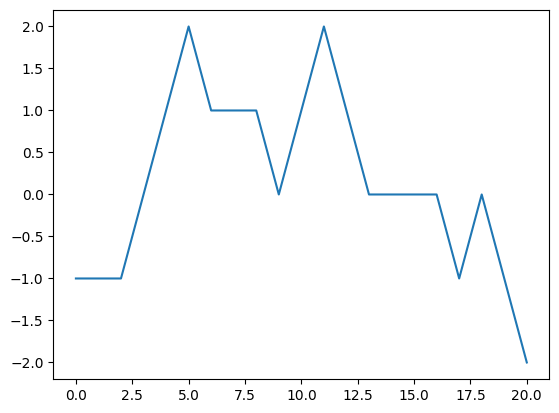

In [4]:
plt.plot(skew(x))
plt.show()

#### (3) Calculate and plot the skew for the E.coli genome.

In [5]:
ecoli = open("EColi.fasta.txt", 'r').read().split()
ecoli = "".join(ecoli)

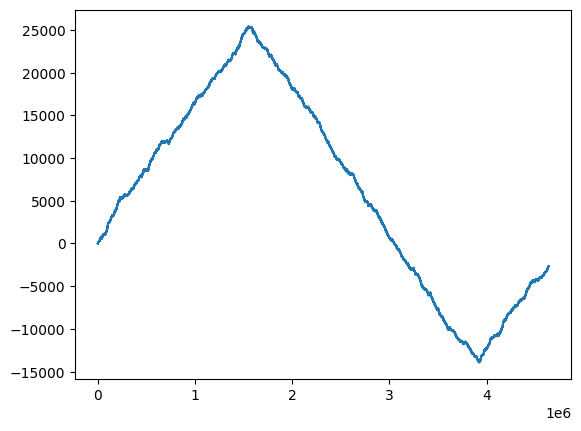

In [6]:
plt.plot(skew(ecoli))
plt.show()

#### (4) Now, write a function to find all the locations that skew is minimized. These are our candidates for Ori. 
`MinimizeSkew("TAAAGACTGCCGAGAGGCCAACACGAGTGCTAGAACGAGGGGCGTAAACGCGGGTCCGAT")` would have an output of `[11, 24]`

In [7]:
def minimizeSkew(text):
    minimum = 0
    locations = []
    count = 1
    for i in skew(text):
        if i < minimum:
            minimum = i
            locations = [count]
        elif i==minimum:
            locations.append(count)
        count+=1
    return locations
y="TAAAGACTGCCGAGAGGCCAACACGAGTGCTAGAACGAGGGGCGTAAACGCGGGTCCGAT"
print(minimizeSkew(y))

[11, 24]


#### (5) What position(s) minimize the skew in E.coli?

In [8]:
print(minimizeSkew(ecoli))

[3923620, 3923621, 3923622, 3923623]


#### (6) Use that position and a window size of 500 to see if any 9-mers, and their reverse complements, appear together 3 or more times?

In [9]:
for i in minimizeSkew(ecoli):
    print(FindClumps(ecoli[i:i+100],9,500,3))

set()
set()
set()
set()


***
## Step 4: Account for Mismatches
It seems that we are stuck again. We have an approximate location for the Ori but we haven't found the DnaA Box yet. We need to turn back to biology for some help here. 

Small genetic variations occur frequently and biology is often flexible enough to handle the differing situations. That being said, DnaA will bind imperfect DnaA boxes. We need to account for that in our code.

We can measure how close two k-mers are using the <font color = #800080><b>Hamming Distance</b></font>. The Hamming Distance will calculate the number of mis-matches (locations where the two nucleotides are not exact) between two k-mers. For example, `CGAAT` and `CGGAC` have a two mismatches. 

#### (7) Write a function to calculate the hamming distance between two strings.

An input of `HammingDist("GGGCCGTTGGT", "GGACCGTTGAC")` will have an output of `3`

In [10]:
def hammingDist(textA, textB):
    dist = 0
    length = len(textA)
    for i in range(length):
        if textA[i] != textB[i]:
            dist+=1
    return dist
textA = "GGGCCGTTGGT"
textB = "GGACCGTTGAC"
print(hammingDist(textA,textB))

3


#### (8) Now, lets re-write our `PatternCount` function to allow for approximate matches - matches with a Hamming Distance $\le$ d when compared to the pattern. Your function will take in a pattern, a genome and a Hamming Distance cut off of d.

`ApproximatePatternCount("TTTAGAGCCTTCAGAGG", "GAGG", 2)` will have an output of 4.

In [11]:
def approxPatternCount(text, pattern, d):
    count = 0
    t = len(text)
    p = len(pattern)
    for i in range(t-p+1):
        patternTwo = text[i:i+p]
        if hammingDist(pattern, patternTwo) <= d:
            count += 1
    return count
example = "TTTAGAGCCTTCAGAGG"
print(approxPatternCount(example, "GAGG", 2))

4


#### (9) Write a function that will do Approximate Pattern Matching. We want to find the locations of all approximate occurrences of a pattern in a string. Your function will take in a genome, pattern and a Hamming Distance cutoff `d`.

`ApproximateMatch("CGCCCGAATCCAGAACGCATTCCCATATTTCGGGACCACTGGCCTCCACGGTACGGACGTCAATCAAAT", "ATTCTGGA", 3)` will have an output of `[6, 7, 26, 27]`

In [12]:
def approxMatch(genome, pattern, d):
    '''Finds all locations of pattern in genome.'''
    locations = []
    k = len(pattern)
    n = len(genome)
    for i in range(n-k+1):
        patternTwo = genome[i:i+k]
        if hammingDist(pattern, patternTwo) <= d:
            locations.append(i)
    return locations
example = "CGCCCGAATCCAGAACGCATTCCCATATTTCGGGACCACTGGCCTCCACGGTACGGACGTCAATCAAAT"
print(approxMatch(example, "ATTCTGGA", 3))

[6, 7, 26, 27]


#### (10) Write a `Neighbors` function to generate all the k-mers that are in the <i>d</i>-neighborhood of a given pattern.

This function uses recursion to generate a collection of k-mers in the <b><i>d</i>-neighborhood</b> of the pattern. The k-mers generated by `Neighbors(Pattern,d)` should be within a Hamming Distance of d from the pattern.

`Neighbors('AA',1)` should yield an output of `{'AA', 'AC', 'AG', 'AT', 'CA', 'GA', 'TA'}`
`Neighbors('ACG',1)` should yield an output of `{'AAG', 'ACA', 'ACC', 'ACG', 'ACT', 'AGG', 'ATG', 'CCG', 'GCG', 'TCG'}`

In [13]:
def neighbors(pattern, d):
    nucTides = {'A','C','G','T'}
    if d==0:
        return {pattern}
    if len(pattern)==1:
        return nucTides
    progNeighbors = neighbors(pattern[1:], d)
    
    bors = set()
    for i in progNeighbors:
        if hammingDist(pattern[1:], i) < d:
            bors.update([nuc + i for nuc in nucTides])
        else:
            bors.add(pattern[0] + i)
    
    return bors
print(neighbors('ACG', 1))

{'CCG', 'ATG', 'AAG', 'ACA', 'TCG', 'ACC', 'AGG', 'ACG', 'ACT', 'GCG'}


#### (11) Next up is the re-writing of our Frequent Words problem. Now, we want to find Frequent Words with Mismatches. 
To do this efficiently, we will use a frequency table  (dictionary) to count the number of times a string has an approximate match in `Text`.  

Our `Neighbors` function will come in handy here.

`FrequentWordsWithMismatches("ACGTTGCATGTCGCATGATGCATGAGAGCT", 4, 1)` will generate a list similar to `["ATGC", "ATGT", "GATG"]`

In [14]:
def freqWordsWithMisMatch(text, k, d):
    
    patterns = []
    freqMap = {}
    n = len(text)
    
    for i in range(n-k+1):
        pattern = text[i:i+k]
        bors = neighbors(pattern, d)
        for j in bors:
            nB = j
            freqMap[nB] = freqMap.get(nB, 0) + 1
    m = MaxMap(freqMap)
    for key in freqMap:
        if freqMap[key] == m:
            patterns.append(key)
    return patterns
print(freqWordsWithMisMatch("ACGTTGCATGTCGCATGATGCATGAGAGCT", 4, 1))

['ATGT', 'GATG', 'ATGC']


#### (12) Finally, can you edit your function from part 11 to account for the reverse complement? 

You want your function to find all k-mers that maximize `ApproximatePatternCount(Text, Pattern, d) + ApproximatePatternCount(Text, Pattern_rc, d)` over all possible k-mers. 

`FrequentWordsWithMismatchesRC("ACGTTGCATGTCGCATGATGCATGAGAGCT", 4, 1)` should give an output of `["ATGT", "ACAT"]`

In [15]:
#Old Code, please ignore
def freqWordsWithMismatchRC(text, k, d):
    reverseC = ReverseComplement(text)
    print(reverseC)
    textWords = freqWordsWithMisMatch(text, k, d)
    print(textWords)
    textRWords = freqWordsWithMisMatch(reverseC, k, d)
    print(textRWords)
    print(approxPatternCount(reverseC, "GCAT", d))
    finalList = [None, None]
    m=0
    for i in range(len(textWords)):
        temp = approxPatternCount(text, textWords[i], d)
        if  temp > m:
            finalList[0] = textWords[i]
            m = temp
    m=0
    for j in range(len(textRWords)):
        temp = approxPatternCount(reverseC, textRWords[j], d)
        if temp > m:
            finalList[1] = textRWords[j]
            m = temp
    return finalList
x="ACGTTGCATGTCGCATGATGCATGAGAGCT"
print(freqWordsWithMismatchRC(x, 4, 1))

AGCTCTCATGCATCATGCGACATGCAACGT
['ATGT', 'GATG', 'ATGC']
['GCAT', 'ACAT', 'CATC']
5
['ATGT', 'GCAT']


In [16]:
def freqWordsWithMisMatchRC(text, k, d):
    
    patterns = []
    freqMap = {}
    n = len(text)
    
    for i in range(n-k+1):
        pattern = text[i:i+k]
        bors = neighbors(pattern, d)
        for j in bors:
            nB = j
            reverseNB = ReverseComplement(j)
            freqMap[nB] = freqMap.get(nB, 0) + 1
            freqMap[reverseNB] = freqMap.get(reverseNB, 0) + 1
    m = MaxMap(freqMap)
    for key in freqMap:
        if freqMap[key] == m:
            patterns.append(key)
    return patterns
print(freqWordsWithMisMatchRC("ACGTTGCATGTCGCATGATGCATGAGAGCT", 4, 1))

['ATGT', 'ACAT']


#### (13) Lets try finding the DnaA box for E.coli again. Using the position we found in problem 17 that minimized skew and a window size of 500, look for 9-mers (with 1 mismatch and reverse complement).

In [17]:
shortEcoli = minimizeSkew(ecoli)
print(freqWordsWithMisMatchRC(ecoli[shortEcoli[0]:shortEcoli[0]+500], 9, 1))

['AATGATCCG', 'CGGATCATT', 'AAGGATCCT', 'AGGATCCTT', 'TCTGGATAA', 'TTATCCAGA', 'AGCTGGGAT', 'ATCCCAGCT', 'GCTGGGATC', 'GATCCCAGC', 'CTGGGATCA', 'TGATCCCAG', 'GGATCCTGG', 'CCAGGATCC', 'CAGAAGATC', 'GATCTTCTG', 'AGATCTCTT', 'AAGAGATCT', 'TGTGGATAA', 'TTATCCACA', 'TGTGAATAA', 'TTATTCACA', 'GTGGATAAC', 'GTTATCCAC', 'TGGATAACC', 'GGTTATCCA', 'AGGATCAAC', 'GTTGATCCT', 'TGATCAACA', 'TGTTGATCA', 'AGAACAACA', 'TGTTGTTCT', 'GATCAACAG', 'CTGTTGATC']


#### (14) As a part of this Ori finding exercise, we looked at three different bacterial genomes. Inside the Ori of these different genomes, we found frequent k-mers, other than our DnaA box, that occurred surprisingly frequently. Why do you think this is? 